In [2]:
pip install mlrose

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=f5966c63a78632a709066c299a3bcad96b094b70144323f1ddcb3287c17d5aa8
  Stored in directory: /home/sophie/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [21]:
import mlrose as ml
import numpy as np
import time
import matplotlib.pyplot as plt

In [96]:
def plot_4_graphs(param, curves, title="", param_name="", curve_name="", x_range=(1,100), y_range=(0.5,1)):
    plt.figure()
    y1, = plt.plot(param, curves[0,:],ls='-', marker='+' , color='blue')
    y2, = plt.plot(param, curves[1,:],ls='-', marker='+', color='red')
    y3, = plt.plot(param, curves[2,:], ls='-', marker='+', color='green')
    y4, = plt.plot(param, curves[3,:], ls='-', marker='+', color='yellow')
    
    # plt.xlim(x_range)
    # plt.ylim(y_range)
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    plt.title=title
    
    plt.legend(handles=[y1,y2,y3,y4],labels=['RHC', 'SA', 'GA','MIMIC'], loc='best')
    
    plt.show()

In [44]:
def plot_graph(param, curves, param_name="", curve_name=""):
    plt.figure()
    plt.plot(param, curves, ls='-', marker='o' , color='blue')
    
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    
    plt.show()

In [116]:
# init params for problem
input_size = [20,30,40,50]
l_input = len(input_size)
iter_size = [1,2,3,5,10,20,30,50,100]
l_iter = len(iter_size)

In [163]:
# init problem
def init_problem(in_size):
    points = np.random.choice(range(in_size ** +1), in_size, replace=False)
    coords = list(zip(points // (in_size), points % (in_size)))
    
    fitness_coords = ml.TravellingSales(coords = coords)
    problem_fit = ml.TSPOpt(length=in_size, fitness_fn=fitness_coords, maximize=False)
    return problem_fit

In [184]:
geom = ml.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)
arith = ml.ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
exp = ml.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001)

In [135]:
def rhcAlgo(ft=problem_fit, it=1000, res=0, maxatt=10):
    t0 = time.time()
    best_state, best_fitness, curve = ml.random_hill_climb(ft, max_attempts = maxatt, max_iters=it, restarts=res,
                                                           random_state = 2,curve=True)
    dt = time.time() - t0
    
    perform = np.zeros((1,2))
    perform[0,0] = best_fitness
    perform[0,1] = dt
    return best_fitness, dt

In [187]:
def SA(ft=problem_fit, it=1000, mut=0.1, maxatt=10, sch=geom):
    t0 = time.time()
    best_state, best_fitness, curve = ml.simulated_annealing(ft, max_attempts = maxatt, max_iters=it, schedule=sch,
                                                             random_state = 2,curve=True)
    dt = time.time() - t0
    
    perform = np.zeros((1,2))
    perform[0,0] = best_fitness
    perform[0,1] = dt
    return best_fitness, dt

In [132]:
def GA(ft=problem_fit, it=1000, pop=200, mut=0.15, maxatt=10):
    t0 = time.time()
    best_state, best_fitness, curve = ml.genetic_alg(ft, pop_size=pop, mutation_prob=mut, max_attempts=maxatt, 
                                                     max_iters=it, random_state = 2,curve=True)
    dt = time.time() - t0
    
    perform = np.zeros((1,2))
    perform[0,0] = best_fitness
    perform[0,1] = dt
    return best_fitness, dt

In [131]:
def mimicAlgo(ft=problem_fit, it=1000, pop=200, maxatt=10, pct=0.1):
    t0 = time.time()
    best_state, best_fitness, curve = ml.mimic(ft, pop_size=pop, keep_pct=pct, max_attempts=maxatt, max_iters=it, 
                                               random_state = 2,curve=True)
    dt = time.time() - t0
    
    perform = np.zeros((1,2))
    perform[0,0] = best_fitness
    perform[0,1] = dt
    return best_fitness, dt

In [210]:
pb_fit = init_problem(20)

In [256]:
pop_size = [10, 20, 50, 100, 200, 500, 600, 1000]
l_pop = len(pop_size)

perfs_ga_pop = np.zeros((1, l_pop))
times_ga_pop = np.zeros((1, l_pop))
for i in range(l_pop):
    perfs_ga_pop[0, i], times_ga_pop[0, i] = GA(ft=pb_fit, it=100, pop=pop_size[i],mut=0.16)

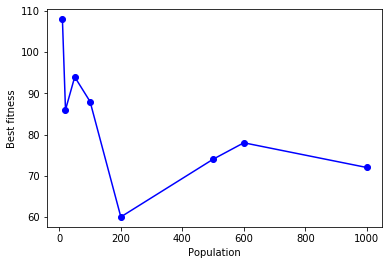

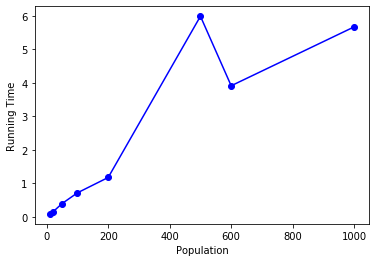

In [257]:
plot_graph(pop_size, perfs_ga_pop[0,:], param_name="Population", curve_name="Best fitness")
plot_graph(pop_size, times_ga_pop[0,:], param_name="Population", curve_name="Running Time")

In [251]:
mut_size = [0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24,0.26, 0.28]
l_mut = len(mut_size)

perfs_ga_mut = np.zeros((1, l_mut))
times_ga_mut = np.zeros((1, l_mut))
for i in range(l_mut):
    perfs_ga_mut[0, i], times_ga_mut[0, i] = GA(ft=pb_fit, it=50, pop=200, mut=mut_size[i])

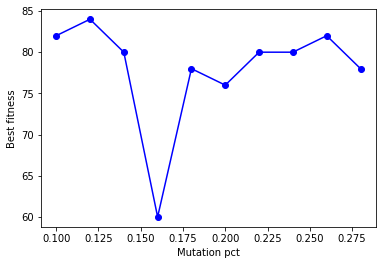

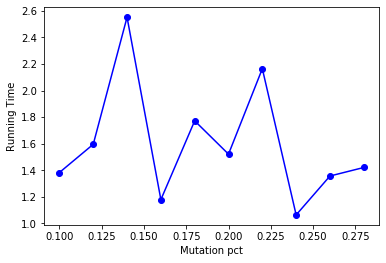

In [252]:
plot_graph(mut_size, perfs_ga_mut[0,:], param_name="Mutation pct", curve_name="Best fitness")
plot_graph(mut_size, times_ga_mut[0,:], param_name="Mutation pct", curve_name="Running Time")

In [246]:
print(GA(ft=pb_fit, it=50, pop=200, mut=0.16))

(60.0, 1.182058334350586)


[[82. 84. 80. 60. 78. 76. 80. 80. 82. 78.]]


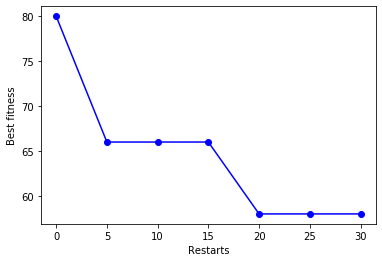

In [254]:
list_res = [0,5,10,15,20,25,30]
perfs_rhc_res = np.zeros((1, len(list_res)))
times_rhc_res = np.zeros((1, len(list_res)))
for i in range(len(list_res)):
    perfs_rhc_res[0,i], times_rhc_res[0,i] = rhcAlgo(ft=pb_fit, it=100, res=list_res[i])
print(perfs_ga_mut)
plot_graph(list_res, perfs_rhc_res[0,:], param_name="Restarts", curve_name="Best fitness")

[[158. 158. 158.]]
[[0.06514144 0.05566001 0.05174255]]


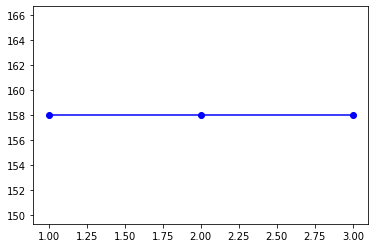

In [195]:
perfs_sa_schdule = np.zeros((1, 3))
times_sa_schdule = np.zeros((1, 3))
perfs_sa_schdule[0,0], times_sa_schdule[0,0] = SA(ft=pb_fit, it=100, maxatt=100, sch=geom)
perfs_sa_schdule[0,1], times_sa_schdule[0,1] = SA(ft=pb_fit, it=100, maxatt=100, sch=arith)
perfs_sa_schdule[0,2], times_sa_schdule[0,2] = SA(ft=pb_fit, it=100, maxatt=100, sch=exp)
print(perfs_sa_schdule)
print(times_sa_schdule)
plot_graph([1,2,3], perfs_sa_schdule[0,:])

In [212]:
print(GA(ft=pb_fit, it=100,pop=600,maxatt=10, mut=0.16))

(78.0, 4.147347450256348)


In [213]:
# comparaison iter size
perfs_4_algo = np.zeros((4, l_iter))
times_4_algo = np.zeros((4, l_iter))
for i in range(l_iter):
    perfs_4_algo[0,i], times_4_algo[0,i] = rhcAlgo(ft=pb_fit, it=iter_size[i])
    perfs_4_algo[1,i], times_4_algo[1,i] = SA(ft=pb_fit, it=iter_size[i])
    perfs_4_algo[2,i], times_4_algo[2,i] = GA(ft=pb_fit, it=iter_size[i], mut=0.16)
    perfs_4_algo[3,i], times_4_algo[3,i] = mimicAlgo(ft=pb_fit, it=iter_size[i])

In [227]:
for i in range(l_iter):
    perfs_4_algo[0,i], times_4_algo[0,i] = rhcAlgo(ft=pb_fit, it=iter_size[i], res=0)

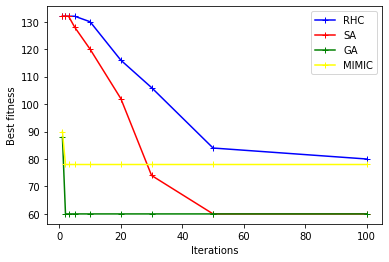

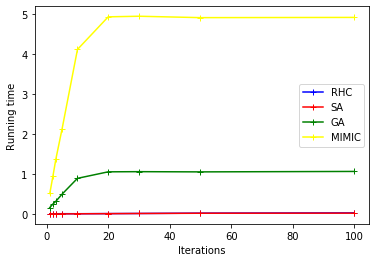

In [255]:
plot_4_graphs(iter_size, perfs_4_algo, param_name="Iterations", curve_name="Best fitness")
plot_4_graphs(iter_size, times_4_algo, param_name="Iterations", curve_name="Running time")

In [244]:
print(times_4_algo)
print(perfs_4_algo)

[[3.87620926e-03 4.31203842e-03 4.86779213e-03 6.39414787e-03
  5.62357903e-03 8.81624222e-03 1.20279789e-02 2.00076103e-02
  2.67832279e-02]
 [1.99365616e-03 9.10282135e-04 1.14440918e-03 1.92666054e-03
  3.98850441e-03 7.61771202e-03 1.15044117e-02 1.79591179e-02
  2.04038620e-02]
 [1.59851313e-01 2.46829987e-01 3.19431782e-01 4.95513201e-01
  8.90299082e-01 1.05320573e+00 1.05719614e+00 1.05170679e+00
  1.06295776e+00]
 [5.11623144e-01 9.37901974e-01 1.38181639e+00 2.12820911e+00
  4.11280704e+00 4.92812824e+00 4.94268227e+00 4.90798688e+00
  4.91353941e+00]]
[[132. 132. 132. 132. 130. 116. 106.  84.  80.]
 [132. 132. 132. 128. 120. 102.  74.  60.  60.]
 [ 88.  60.  60.  60.  60.  60.  60.  60.  60.]
 [ 90.  78.  78.  78.  78.  78.  78.  78.  78.]]
